# Avance 2 del Proyecto Final

### Integrantes del equipo: 

Francisco Ramon Ramiez Torres; Cesar Gerardo Varela Cavazos; Cesar Alejandro Barrera Martinez

## Titulo: Video Games Sales. (Información histórica de ventas de videojuegos)

### Descripcion de la base de datos: 

Esta base de datos contiene toda la historia de los videojuegos lanzados en su respectivo, año fundada en una empresa en particular, con su respectiva plataforma y las ventas que ha tenido en el Norte de America, EE.UU, Japon, etc; al igual que las ventas globales que ha tenido.

### Descripcion de las columas:

•	Name: Nombre del videojuego.

•	Platform: Plataforma/consola de videojuego.

•	Year: Año de lanzamiento del videojuego.

•	Genre: Genero del videojuego (deportes, shooter, acción, RPG, Terror, etc)

•	Publisher: Empresa que lanza el videojuego (EA,Ubisoft,Activision,Atari,Bandai)

•	NA_Sales: Ventas en Norte América.

•	EU_Sales: Ventas en Estados Unidos.

•	JP_Sales: Ventas en Japón.

•	Other Sales: Otras ventas.

•   Critic_Score

•   Critic_Count       

•   User_Score         

•   User_Count         

•   Developer           

•   Rating            

### Justificacion del uso de los datos.

a). Cuáles fueron las características que les llamó la atención de los datos. Qué les hizo querer trabajar con ellos.

La diversa información acerca de los videojuegos, como la distribución de venta, popularidad de videojuegos, diversa variedad con géneros en los títulos de videojuegos y competencia entre empresas que tienen juegos similares en popularidad.

b)	Qué beneficio encuentran de trabajar con estos datos.

Poder encontrar algún beneficio de manera que podemos calcular un precio estimado de un videojuego, ver un análisis de ventas sobre cómo se han visto ventas con otras empresas, podemos ver qué clase de videojuegos se han vendido más a través de los años según su aceptación para las empresas que se dedican a crear juegos puedan saber que genero es el que deben crear más.

### Preguntas de Interes

¿Cuál es la percepción de aceptación de un videojuego de alguna empresa (simulando una venta en una región)?

¿Con los datos de la base de datos de videojuegos como se pueden clasificar aplicando algún método de minería de datos?

¿Cómo se puede aplicar una red neuronal con de tipo clasificación con la base de datos?

### Manipulacion de la informacion

In [1]:
import numpy as np
import pandas_profiling
import pandas as pd
import json
import matplotlib as plt

a)	Mostrar los datos sin manipulación.

Para mejor entendimiento de como esta compuesta la base de datos, se comenzara visualizando la informacion de toda la tabla, debido a que contiene arriba de 11,000 elementos, se visualizaran los primeros 10.  

In [2]:
bd= pd.read_csv("train.csv")
bd.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Rapala Trophies,PSP,2006.0,Sports,Activision,0.04,0.00,0.00,0.00,NaN,NaN,NaN,NaN,Sand Grain Studios,E
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.30,1.34,1.27,0.32,84.0,70.0,8.1,733.0,Nintendo,E
2,Robots,PS2,2005.0,Action,Vivendi Games,0.18,0.14,0.00,0.05,53.0,6.0,6.0,8.0,Eurocom Entertainment Software,E
3,Hamster Club 3,GBA,2002.0,Simulation,Jorudan,0.00,0.00,0.35,0.01,NaN,NaN,NaN,NaN,NaN,NaN
4,Formula 1 06,PS2,2006.0,Racing,Sony Computer Entertainment,0.00,0.00,0.04,0.00,NaN,NaN,NaN,NaN,NaN,NaN
5,My Ballet Studio,Wii,2009.0,Simulation,505 Games,0.02,0.00,0.00,0.00,NaN,NaN,NaN,NaN,505 Games,E
6,EVE Online,PC,2003.0,Role-Playing,CCP,0.00,0.19,0.00,0.01,69.0,22.0,7.5,280.0,CCP,T
7,S.T.A.L.K.E.R.: Shadow of Chernobyl,PC,2007.0,Shooter,THQ,0.01,0.04,0.00,0.01,82.0,44.0,8.4,1088.0,GSC Game World,M
8,Madden NFL 2003,XB,2002.0,Sports,Electronic Arts,0.67,0.02,0.00,0.03,92.0,16.0,8.3,16.0,EA Tiburon,E
9,Shin Super Robot Taisen,PS,1996.0,Role-Playing,Banpresto,0.00,0.00,0.52,0.04,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
bd.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

Despues veremos si la tabla contiene valores nulos con la siguinte respuesta: si marca 'True' significa que no hay columnas que no tienen registros; si manrca 'False' es que si hay registro de cada columna, como se muestra a continuacion:

In [5]:
bd.isnull().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

b)	Eliminar columnas no deseadas.

Por lo que vemos que las columnas que contienen en alguin registro de la tabla son las columnas: Name, Year_od_Release, Genre, Publisher, Critic_Score, Critic_Count, User_Score, User_Cont, Developer, Rating.

Y se van a quitar algunas de esas columnas que no nos seran de utilidad para el analisis que vamos a hacer, las cuales son: Critic_Score, Critic_Count, User_Score, User_Cont, Developer; debido a que si observamos la base de datos a porfundidad, se vera que estas columnas son las que mas datos contienen.

In [6]:
cambios= bd.drop(['User_Count', 'User_Score', 'Critic_Count','Critic_Score','Developer'], axis=1)
cambios.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Rating
0,Rapala Trophies,PSP,2006.0,Sports,Activision,0.04,0.00,0.00,0.00,E
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.30,1.34,1.27,0.32,E
2,Robots,PS2,2005.0,Action,Vivendi Games,0.18,0.14,0.00,0.05,E
3,Hamster Club 3,GBA,2002.0,Simulation,Jorudan,0.00,0.00,0.35,0.01,NaN
4,Formula 1 06,PS2,2006.0,Racing,Sony Computer Entertainment,0.00,0.00,0.04,0.00,NaN
5,My Ballet Studio,Wii,2009.0,Simulation,505 Games,0.02,0.00,0.00,0.00,E
6,EVE Online,PC,2003.0,Role-Playing,CCP,0.00,0.19,0.00,0.01,T
7,S.T.A.L.K.E.R.: Shadow of Chernobyl,PC,2007.0,Shooter,THQ,0.01,0.04,0.00,0.01,M
8,Madden NFL 2003,XB,2002.0,Sports,Electronic Arts,0.67,0.02,0.00,0.03,E
9,Shin Super Robot Taisen,PS,1996.0,Role-Playing,Banpresto,0.00,0.00,0.52,0.04,NaN


c)	Correcta manipulación de los datos nulos dentro de la base de datos.

Una vez hecho esto, se eliminaran los registros de que contengan algun dato nulo, para poder trabajar con registros completos en su totalidad, y lo gradaremos en una nueva variable.

In [7]:
nuevo = cambios.dropna()
nuevo

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Rating
0,Rapala Trophies,PSP,2006.0,Sports,Activision,0.04,0.00,0.00,0.00,E
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.30,1.34,1.27,0.32,E
2,Robots,PS2,2005.0,Action,Vivendi Games,0.18,0.14,0.00,0.05,E
5,My Ballet Studio,Wii,2009.0,Simulation,505 Games,0.02,0.00,0.00,0.00,E
6,EVE Online,PC,2003.0,Role-Playing,CCP,0.00,0.19,0.00,0.01,T
...,...,...,...,...,...,...,...,...,...,...
11696,Secret Files: Tunguska,Wii,2008.0,Adventure,Koch Media,0.04,0.01,0.00,0.00,T
11698,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,M
11699,Resistance 3,PS3,2011.0,Shooter,Sony Computer Entertainment,0.64,0.57,0.05,0.22,M
11700,Ready 2 Rumble Revolution,Wii,2009.0,Sports,Atari,0.15,0.00,0.00,0.01,T


Despues con el siguiente comando se eliminaran toda los registros repetidos de la columna Name que contiene los nombres de los videojuegos.

e)	Crear un nuevo archivo con la base de datos editada.

In [8]:
nuevo_2= nuevo.drop_duplicates(['Name'])

A partie de ahora se gurdara esta nueva base de datos con otro archivo.

In [9]:
nuevo_2.to_csv('Nueva_BD.csv', index=False)
corregida = pd.read_csv('Nueva_BD.csv')

In [10]:
corregida.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Rating
0,Rapala Trophies,PSP,2006.0,Sports,Activision,0.04,0.00,0.00,0.00,E
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.30,1.34,1.27,0.32,E
2,Robots,PS2,2005.0,Action,Vivendi Games,0.18,0.14,0.00,0.05,E
3,My Ballet Studio,Wii,2009.0,Simulation,505 Games,0.02,0.00,0.00,0.00,E
4,EVE Online,PC,2003.0,Role-Playing,CCP,0.00,0.19,0.00,0.01,T
5,S.T.A.L.K.E.R.: Shadow of Chernobyl,PC,2007.0,Shooter,THQ,0.01,0.04,0.00,0.01,M
6,Madden NFL 2003,XB,2002.0,Sports,Electronic Arts,0.67,0.02,0.00,0.03,E
7,Assassin's Creed Syndicate,XOne,2015.0,Action,Ubisoft,0.62,0.56,0.00,0.11,M
8,Devil's Third,WiiU,2015.0,Action,Nintendo,0.04,0.02,0.00,0.01,M
9,Space Chimps,PS2,2008.0,Platform,Brash Entertainment,0.06,0.05,0.00,0.02,E10+


Por ultimo cambiamos el tipo de dato del año de lanzamiento para ajustarlo como dato entero.

In [11]:
corregida['Year_of_Release'].astype("int")

0       2006
1       2012
2       2005
3       2009
4       2003
        ... 
4671    2002
4672    2008
4673    2003
4674    2011
4675    2009
Name: Year_of_Release, Length: 4676, dtype: int32

### Estadistica en los Datos

Para este apartado se respondera a nuestras preguntas de interes, se hara mediante el uso de la estadistica.  

Por lo que se respondera a la siguiente pregunta: ¿Cuál es la percepción de aceptación de un videojuego de alguna empresa (simulando una venta en una región)?. Para responder a la pregunta se calculara un promedio de todas las ventas en las regiones de Norte America(NA), Japon(JP), Estados Unidos(EU)

In [12]:
corregida['NA_Sales'].mean()

0.32714285714285174

In [13]:
corregida['EU_Sales'].mean()

0.1838751069289961

In [14]:
corregida['JP_Sales'].mean()

0.06282292557741659

Una vez calculado el promedio podemos determinar que para sacar un nivel de aceptacion bueno de ventas en las tres regiones mencionadas tendria que estar en un rango igual o mayor al promedio calculado. Para el caso de Norte America tendria que considerarse bien de venta una cantidad igual o mayor a 0.327142...; para Estados Unidos igual o mayor a 0.183875...; y para Japon igual o mayor a: 0.062822....

Ahorra respondiendo a la pregunta: ¿Con los datos de la base de datos de videojuegos como se pueden clasificar aplicando algún método de minería de datos? se usara la funcion describe, en el que viene la cantidad de ventas minima y maxima y unos rangos de venta que calcula la funcion por columna, en el que determinamos que en el 25% de venta de cada region su venta calculada la determinariamos como 'Mala', para el 50% la determinariamos como 'Regular' y para 75% de venta como buena, ya revasando este porcentaje como 'Muy buena'.

In [15]:
corregida['NA_Sales'].describe()

count    4676.000000
mean        0.327143
std         0.985394
min         0.000000
25%         0.040000
50%         0.110000
75%         0.280000
max        41.360000
Name: NA_Sales, dtype: float64

In [16]:
corregida['EU_Sales'].describe()

count    4676.000000
mean        0.183875
std         0.684735
min         0.000000
25%         0.010000
50%         0.030000
75%         0.140000
max        28.960000
Name: EU_Sales, dtype: float64

In [17]:
corregida['JP_Sales'].describe()

count    4676.000000
mean        0.062823
std         0.294704
min         0.000000
25%         0.000000
50%         0.000000
75%         0.010000
max         6.500000
Name: JP_Sales, dtype: float64

### Graficas 

Daremos uso de las graficas en el que se mostrara la cantidad de frecuencias de cada cantidad de ventas de videojuegos hechas en Norte America para poder determinar cuantos videojuegos tienen mayor cantidad de venta acorde al estandar mencionado

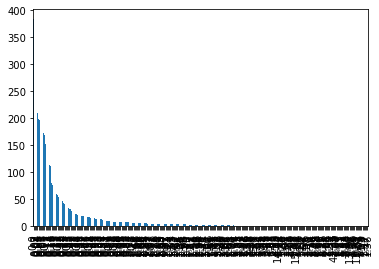

In [49]:
%matplotlib inline
corregida['NA_Sales'].value_counts().plot.bar()

Podemos apreciar a grandes rasgos de la grafica que hay muy pocos videojuegos que tienen que tienen una cantidad de grandes. Pero para apreciar mejor la grafica, se le reducira la cantidad de datos. 

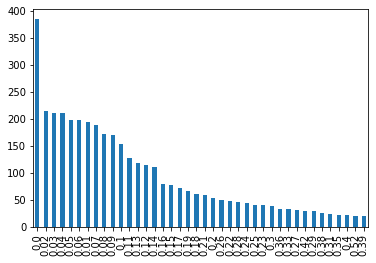

In [52]:
corregida['NA_Sales'].value_counts().head(40).plot.bar()

Al igual haremos esto con las ventas de videojuegos en Estados Unidos.

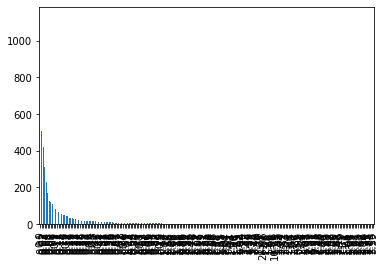

In [53]:
corregida['EU_Sales'].value_counts().plot.bar()

Y de igual manera se ve que hay muy pocos videojuegos que tienen una cantidad alta de venta de videojuegos en esta region, nadamas que para este caso hay mas cantidades de videojuegos que no tienen casi nada de venta, llegando casi a 1000 casos de videojuegos, y se mostrara otra grafica pero ya con pocos datos para poderla aprecir mejor.

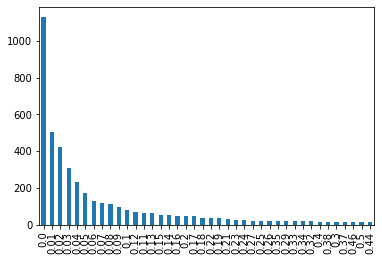

In [55]:
corregida['EU_Sales'].value_counts().head(40).plot.bar()

Y tambien veremos la cantidad de venta de videojuegos para Japon

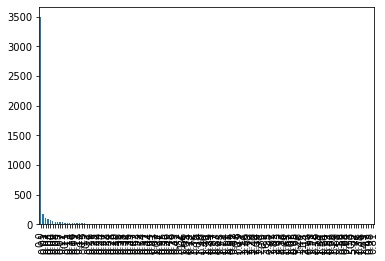

In [56]:
corregida['JP_Sales'].value_counts().plot.bar()

Y al igual que en las otras graficas se ve que hay muy pocos videojuegos con grandes ventas y hay demaciados productos con nada de ventas en la regios de Japon con o ventas.

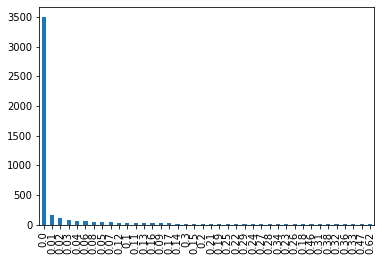

In [58]:
corregida['JP_Sales'].value_counts().head(40).plot.bar()

Y tambien se mostrara una grafica de cantidad de ventas de videojuegos para ver cuales son los que estan mas lanzados al mercado independientemente de las ventas obtenidas.

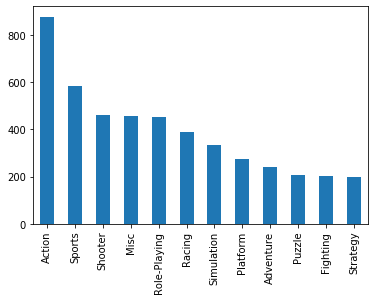

In [59]:
corregida['Genre'].value_counts().plot.bar()

Por lo que se visualiza que el genero de videojuegos que esta mas lanzado al mercado es el de Accion, y podemos concluir que es de las mas solicitadas por el publico.

### Conclusion general

Se concluye que los numeros de ventas mas altos por las tres regiones solicitadas se encuentra en un rango de: en Norte America de entre 41 a 42; en Estados Unidos de 28 a 29; y en Japon entre 6 a 7. Ademas de que en Japon hay muy pocas cantidades de venta de videojuegos dando a entender que de las tres regiones en Japon no es de tanto interes los videojuegos, segun la base de datos analizada.

Y que el genero de videojuegos mas solicitados es el de accion, y esto pudiese ser por el tipo de impacto que tienen este genero debido al entretenimiento que tratan este mismo genero.